In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

import json

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("*.cali"))

(2/2) Creating Thicket: 100%|██████████| 279/279 [00:08<00:00, 32.65it/s]


View Calltree

In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.613 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
0.488 main
├─ 0.361 MPI_Bcast
├─ 0.015 comm
│  ├─ 0.003 comm_large
│  │  └─ 0.003 MPI_Gather
│  └─ 0.012 comm_small
│     └─ 0.012 MPI_Scatter
├─ 0.099 comp
│  ├─ 1.578 comp_large
│  └─ 0.050 comp_small
├─ 0.047 correctness_check
└─ 0.370 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 1.61 indices: {'profile': 42247489})
█ 1.45 - 1.61
█ 1.13 - 1.45
█ 0.81 - 1.13
█ 0.48 - 0.81
█ 0.16 - 0.48
█ 0.00 - 0.16

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [6]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size"]).sort_index()

tk.dataframe.head(10)

profile  \
node                                         num_procs input_size               
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536       2109653442   
                                                       65536       2238671489   
                                                       65536       2478832761   
                                                       65536       3918319023   
                                                       262144       319047922   
                                                       262144      2063312718   
                                                       262144      4064691016   
                                                       262144      4108216775   
                                                       1048576      923472906   
                                                       1048576     1440456721   

                                                                    nid  \
node                                         num_procs input_size         
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536       20.0   
                                                       65536       20.0   
                                                       65536       20.0   
                                                       65536       20.0   
                                                       262144      20.0   
                                                       262144      20.0   
                                                       262144      20.0   
                                                       262144      20.0   
                                                       1048576     20.0   
                                                       1048576     20.0   

                                                                    spot.channel  \
node                                         num_procs input_size                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536       regionprofile   
                                                       65536       regionprofile   
                                                       65536       regionprofile   
                                                       65536       regionprofile   
                                                       262144      regionprofile   
                                                       262144      regionprofile   
                                                       262144      regionprofile   
                                                       262144      regionprofile   
                                                       1048576     regionprofile   
                                                       1048576     regionprofile   

                                                                   Min time/rank  \
node                                         num_procs input_size                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536            0.002482   
                                                       65536            0.000107   
                                                       65536            0.000111   
                                                       65536            0.000111   
                                                       262144           0.000109   
                                                       262144           0.000109   
                                                       262144           0.000109   
                                                       262144           0.000109   
                                                       1048576          0.000149   
                                                       1048576          0.001810   

                                                                   Max time/rank  \
node                                         num_procs input_size                  
{'name': '

In [7]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]

In [8]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [9]:
print(tk.dataframe)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    return plot

In [11]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    ax.set_xticklabels(threads)
    plt.show()
    return fig, ax

In [12]:
tk.dataframe.keys()

Index(['profile', 'nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank', 'Calls/rank (min)',
       'Calls/rank (avg)', 'Calls/rank (max)', 'Calls/rank (total)',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'name'],
      dtype='object')

In [34]:
tk.dataframe

,,,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),name
node,num_procs,input_size,,,,,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",16,1024,1134066059,1.0,regionprofile,0.007366,0.009518,0.007551,0.120810,0.0,1.0,1.0000,1.0,16.0,0.001006,0.002939,0.001188,0.019002,main
"{'name': 'data_init_runtime', 'type': 'function'}",16,1024,1134066059,2.0,regionprofile,0.000045,0.000045,0.000045,0.000045,0.0,1.0,1.0000,1.0,1.0,0.000045,0.000045,0.000045,0.000045,data_init_runtime
"{'name': 'comm', 'type': 'function'}",16,1024,1134066059,3.0,regionprofile,0.006262,0.006466,0.006333,0.101323,0.0,2.0,2.0000,2.0,32.0,0.000019,0.000023,0.000022,0.000349,comm
"{'name': 'comm_large', 'type': 'function'}",16,1024,1134066059,4.0,regionprofile,0.006241,0.006447,0.006311,0.100974,0.0,2.0,2.0000,2.0,32.0,0.000506,0.000580,0.000553,0.008853,comm_large
"{'name': 'MPI_Scatter', 'type': 'function'}",16,1024,1134066059,5.0,regionprofile,0.004754,0.005741,0.005625,0.089995,0.0,1.0,1.0000,1.0,16.0,0.004754,0.005741,0.005625,0.089995,MPI_Scatter
"{'name': 'MPI_Gather', 'type': 'function'}",16,1024,1134066059,8.0,regionprofile,0.000030,0.001188,0.000133,0.002126,0.0,1.0,1.0000,1.0,16.0,0.000030,0.001188,0.000133,0.002126,MPI_Gather
"{'name': 'comp', 'type': 'function'}",16,1024,1134066059,6.0,regionprofile,0.000024,0.000061,0.000027,0.000432,0.0,1.0,1.0625,2.0,17.0,0.000009,0.000016,0.000010,0.000159,comp
"{'name': 'comp_small', 'type': 'function'}",16,1024,1134066059,7.0,regionprofile,0.000015,0.000016,0.000015,0.000243,0.0,1.0,1.0000,1.0,16.0,0.000015,0.000016,0.000015,0.000243,comp_small
"{'name': 'comp_large', 'type': 'function'}",16,1024,1134066059,9.0,regionprofile,0.000029,0.000029,0.000029,0.000029,0.0,1.0,1.0000,1.0,1.0,0.000029,0.000029,0.000029,0.000029,comp_large


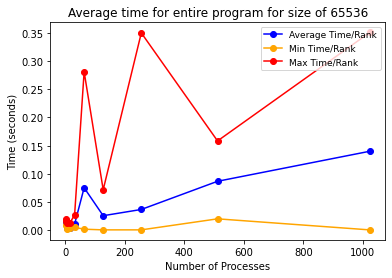

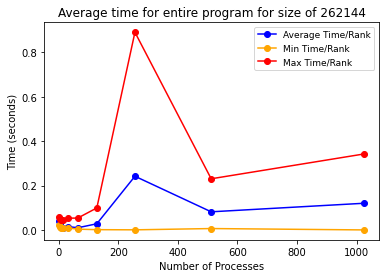

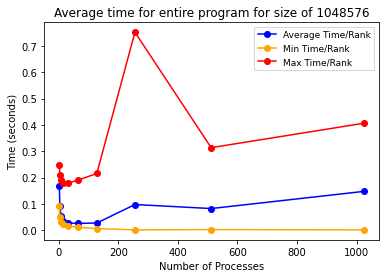

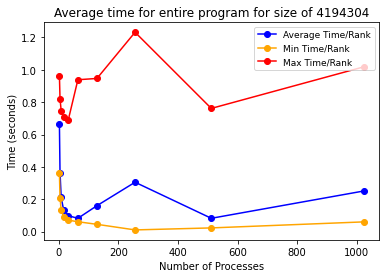

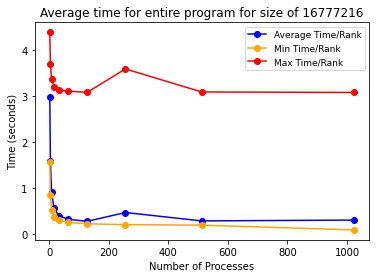

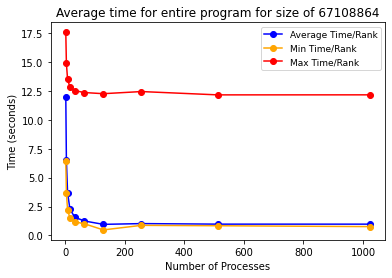

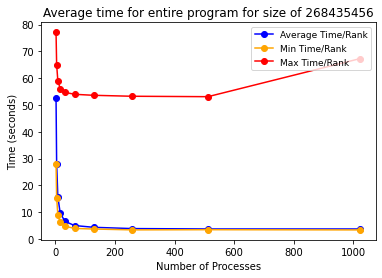

<Figure size 432x288 with 0 Axes>

In [14]:
for node in tk.graph.traverse():
    for m_size in input_sizes:
        if node.frame["name"] in ("main"):
            new_df = tk.dataframe.loc[node]
            x_vals_processes = []
            y_vals_avg = []
            y_vals_min = []
            y_vals_max = []
            data = new_df.loc[(slice(None), m_size), "Avg time/rank"]
            data1 = new_df.loc[(slice(None), m_size), "Min time/rank"]
            data2 = new_df.loc[(slice(None), m_size), "Max time/rank"]
            for process in processes:
                try:
                    temp = data[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_avg.append(avg)
                    x_vals_processes.append(process)
                except:
                    pass
            for process in processes:
                try:
                    temp = data1[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_min.append(avg)
                except:
                    pass
            for process in processes:
                try:
                    temp = data2[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_max.append(avg)
                except:
                    pass
            plt.plot(x_vals_processes, y_vals_avg, marker='o', color='blue', label="Average Time/Rank")
            plt.plot(x_vals_processes, y_vals_min, marker='o', color='orange', label="Min Time/Rank")
            plt.plot(x_vals_processes, y_vals_max, marker='o', color='red', label="Max Time/Rank")
            plt.xlabel("Number of Processes")
            plt.ylabel('Time (seconds)')
            plt.legend(loc=1, prop={'size': 9})
            plt.title(f'Average time for entire program for size of {m_size}')
            plt.savefig(f'./plots/radix_sort_main_{m_size}')
            plt.show()
            plt.clf()
        

In [154]:
!tar chvfz notebook.tar.gz results/

results/
results/1024_master_initialization.png
results/128_master_send_recieve.png
results/8192_worker_calculation.png
results/8192_master_send_recieve.png
results/128_worker_recieve.png
results/1024_master_send_recieve.png
results/1024_worker_recieve.png
results/8192_worker_send.png
results/128_worker_send.png
results/8192_whole_computation.png
results/128_main.png
results/8192_master_initialization.png
results/8192_main.png
results/1024_worker_calculation.png
results/1024_main.png
results/128_worker_calculation.png
results/8192_worker_recieve.png
results/128_whole_computation.png
results/1024_worker_send.png
results/128_master_initialization.png
results/1024_whole_computation.png
